# Presence of Hepatitis C and It's Progress _Karthik Kodakandla_Cu2592    
    Built a Deep Learning Model to predict the presence of Hepatitis C  and it's progress. In the first basic model though the accuracy is more (88%) , all predictions are made with only one class( Blood Donor) as the dataset is imbalanced. This will be considered as naive model. As our main aim is to find the presence of Hepatitis c and it's progress importance should be given for the classes which predict hepatitis C(class 1 to 4). So i have used oversampling method to train the deep learning model on all classes equally. With this i have achieved good prediction and also there are predictions in other classes including a class where only 7 records exists.

# Preprocessing Data:
    1.Features and Target Label: Category column is target variable and we will consider all remaining columns as features. 
    2.Unnamed:0 is Id column and will not be useful for prediction so we can remove it from the analysis.
    3.Missing Values : I have checked for the missing values in the data. There are few missing values so we have imputed the missing values with the mean of the respected columns.
    4.Split data: Splitted data with training features(x_train) , training_label(y_train) , validation_features(x_test) and validation_label(y_test)
    5.Oversampling : as we have imbalanced data set, we used oversampling method on training data to resample the data to get equal number of classes with out any bias. This will help to model training data with equal importance on all clases.

# Build Model:
    Built Keras model with metrics accuracy and recall as both will have equal importance on prediction. Accuracy to show the overall correct predictions and recall to show if the preictions made on all classes with out any bias
 
## 2. a)  1 Hidden Layer vs 2 Hidden Layers
 
    1.Compared Keras model with 1 hidden layer and 2 hidden layers. model with one hidden layer is best when compared with the two hidden layers.
    2.With two hidden layers we are increasing the capacity. As this is not complex model increasing hidden layers will not help much 
 
## 2. b)	No of neurons in hidden layers between (a)2/3 the size of the input layer, plus the size of the output layer, and twice the size of the input layer

    1. compared Keral models with basic model( normalized model) with 2/3 size of the input layer plus the size of the output layer which is 13 neurons and twice the size of the input layer which is 24 neurons. We are basically increasing width of the model. 
    Accuracy of basic model with 8 neurons : 94.47%          Recall of basic model        : 84.55%
    Accuraciy of model with 13 neurons     : 93.82%          Recall of model(13 neurons)  : 82.11%
    Accuracy of model with 24 neurons      : 95.12%          Recall of model (24 neurons) : 87.80%
    
    Based on the graph and above metrics(accuracy and recall) the best model will be model with 24 neurons. But in general we can see that both models over fit as the gap between training and validation increases. We need use regularization to solve this issue in the next models.

## 2. c)  Regularization 
    1. created keras model by introducing l1 regularization and l2 regularization. L2 Regularization is best comapred with l1 regularization here. here as the inputs are less l1 regularization may not be much helpfull. both baseline and l1 regularization are overfitting compared to l2 regulariation model
    
    Accuracy of basic model                  : 94.47%          Recall of basic model               : 84.55%
    Accuraciy of model l1_regularization     : 95.28%          Recall of model(l1_regularization)  : 86.18%
    Accuracy of model l2_regularization      : 96.26%          Recall of model (l2_regularization ): 90.24%
    
    based on the accuracy and recall and also by analyzing the graph, l2 regularization is doing better comapred to others.
 
## 2. d)  Activation function - ReLU and your choice

    1.compared Relu and softplus activation functions and the best accuracy for this model is achieved by Relu when compared with the softplus
    
##  Best Model with Accuracy:

    best model to find the Hepatitis C and it's progress will be L2 regularization model with 1 hidden layer(depth), 24 neurons(width). the best accuracy achieved is 96.26% and recall with 90.24%. It is evenly predicting all cllases even though the dataset is imblanced.
 
## General Considerations 
    used 500 epochs for all models.
    showed few records of the training data.
 


In [1]:
#import all necessary libraries and methods
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
#%tensorflow_version 2.x
from numpy.random import seed
seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from collections import Counter
print(tf.__version__)

2.3.0


In [2]:
# define the dataset location
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00571/hcvdat0.csv'
# load the csv file as a data frame
df = pd.read_csv(url)

### Check few records of the hcv data

In [3]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [4]:
df.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


# Pre-processing Data

from the above data, Category is target variable and we will consider all remaining columns as features. Unnamed:0 is Id column and will not be useful for prediction so we can remove it from the analysis

In [5]:
del df['Unnamed: 0'] #to remove unnames: 0 column

In [6]:
df.info() # to check the data types of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
Category    615 non-null object
Age         615 non-null int64
Sex         615 non-null object
ALB         614 non-null float64
ALP         597 non-null float64
ALT         614 non-null float64
AST         615 non-null float64
BIL         615 non-null float64
CHE         615 non-null float64
CHOL        605 non-null float64
CREA        615 non-null float64
GGT         615 non-null float64
PROT        614 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


from the above, Category and Sex are categorical with object type. we will first consider features for now. Column 'Sex' can be converted to labels using label encoder. Male will become 1 and female will become 0


In [7]:
df['Sex'] = LabelEncoder().fit_transform(df["Sex"])


Missing Values : First we need to check if there are any missing values

In [8]:
df.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

There are few missing values. We can either remove rows or impute with the relevant values. In this example we will impute with mean values of the respected columns.

In [9]:
for i in df.columns[df.isnull().any(axis=0)]:
    df[i].fillna(df[i].mean(),inplace = True)

In [10]:
df.isnull().sum() # no missing values should present

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

# Split data

In [11]:
data = df.values
# split into input and output elements
X, y = df.drop(columns=['Category']), df['Category']
y=pd.DataFrame(y, columns=['Category'])

In [12]:
print(X.head())# Features
print(y.head())# target value

   Age  Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA   GGT  PROT
0   32    1  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0  12.1  69.0
1   32    1  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0  15.6  76.5
2   32    1  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0  33.2  79.3
3   32    1  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0  33.8  75.7
4   32    1  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0  29.9  68.7
        Category
0  0=Blood Donor
1  0=Blood Donor
2  0=Blood Donor
3  0=Blood Donor
4  0=Blood Donor


In [13]:
y['Category'].value_counts()

0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split # train and validatio split with 80% and 20%
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
x_train.head(5) # first few rows of the training data

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
83,39,1,36.6,71.3,28.9,25.9,6.1,5.70,4.660000,77.0,22.6,66.3
90,39,1,45.8,62.5,20.7,22.8,45.5,8.61,4.780000,77.0,15.9,75.5
228,53,1,44.5,61.2,14.4,18.1,8.0,6.95,5.000000,70.0,18.3,72.0
509,58,0,26.3,52.5,39.5,77.2,5.8,5.15,3.530000,40.0,31.2,51.0
329,33,0,42.4,137.2,14.2,13.1,3.4,8.23,5.368099,48.0,25.7,74.4


Target variables has 5 classes from 0 to 4 which shows the progress of Hepatitis C. And from the above we can see that this multiclass data is imbalanced. To solve the imbalance problem in multiclass we can use few methods like class weights etcs. here in this model let's use over sampling method.
Before doing over sampling lets split data into training and validation 

C:\Users\Vandhana\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


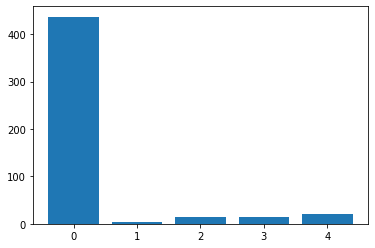

In [16]:
y_train = LabelEncoder().fit_transform(y_train) # Label encoding for Category
y_test = LabelEncoder().fit_transform(y_test)
counter = Counter(y_train)
plt.bar(counter.keys(), counter.values())
plt.show()

Class=0, n=437 (20.000%)
Class=3, n=437 (20.000%)
Class=4, n=437 (20.000%)
Class=2, n=437 (20.000%)
Class=1, n=437 (20.000%)


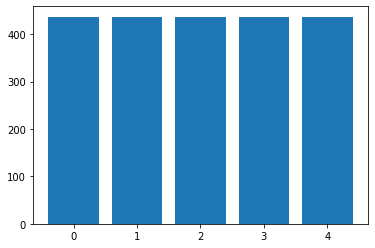

In [17]:
oversample=SMOTE(k_neighbors=2)
x_train, y_train = oversample.fit_resample(x_train, y_train)
# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [18]:
print(x_train.shape,x_test.shape)

(2185, 12) (123, 12)


In [19]:
print(y_train.shape,y_test.shape)

(2185,) (123,)


# using one hot encoding for target variables

In [20]:
nb_classes = 5
targets = y_train.reshape(-1)
targets1 = y_test.reshape(-1)
y_train = np.eye(nb_classes)[targets]
y_test = np.eye(nb_classes)[targets1]

# Keras Model Build

In [21]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

baseline_model = keras.Sequential([
    keras.layers.Dense(8, activation=tf.nn.relu,
                       input_shape=(x_train.shape[1],)),
    keras.layers.Dense(5, activation = tf.nn.softmax)

  ])

baseline_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=METRICS)

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 104       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
Total params: 149
Trainable params: 149
Non-trainable params: 0
_________________________________________________________________


In [22]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS =200

In [23]:

b_history = baseline_model.fit(x_train, y_train, epochs=EPOCHS,batch_size=128,
                    validation_data= (x_test, y_test), verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................

In [24]:
print('Metrics of baseline model without normalization \n  Accuracy: {:.2f}% \n  Recall: {:.2f}% \n'
      .format(max(b_history.history['val_accuracy'])*100,max(b_history.history['val_recall'])*100))


Metrics of baseline model without normalization 
  Accuracy: 91.38% 
  Recall: 77.24% 



In [25]:
valpreds = baseline_model.predict_on_batch(x_test)
y_pred = valpreds.argmax(axis=1)
y_prrd= pd.DataFrame(y_pred,columns=["progress"])
y_prrd['progress'].value_counts()

0    89
2    22
4     7
1     3
3     2
Name: progress, dtype: int64

In [26]:
y_test1 = y_test.argmax(axis=1)
y_test1= pd.DataFrame(y_test1,columns=["progress"])

In [27]:
print(metrics.confusion_matrix(y_test1,y_prrd))
print(metrics.classification_report(y_test1,y_prrd))

[[83  1 11  0  1]
 [ 2  0  0  1  0]
 [ 1  0  7  1  0]
 [ 1  1  3  0  1]
 [ 2  1  1  0  5]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.90        96
           1       0.00      0.00      0.00         3
           2       0.32      0.78      0.45         9
           3       0.00      0.00      0.00         6
           4       0.71      0.56      0.63         9

    accuracy                           0.77       123
   macro avg       0.39      0.44      0.39       123
weighted avg       0.80      0.77      0.78       123



In [28]:
# We can check by normalizing data
scaler = StandardScaler().fit(x_train.values)
scaledf = scaler.transform(x_train.values)
x_train_norm = pd.DataFrame(scaledf, index=x_train.index, columns=x_train.columns)

In [29]:
vscaled = scaler.transform(x_test.values)
x_test_norm = pd.DataFrame(vscaled, index=x_test.index, columns=x_test.columns)


In [30]:
baseline_model_norm = keras.Sequential([
    keras.layers.Dense(8, activation=tf.nn.relu,
                       input_shape=(x_train_norm.shape[1],)),
    keras.layers.Dense(5, activation = tf.nn.softmax)

  ])

baseline_model_norm.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=METRICS)

baseline_model_norm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 45        
Total params: 149
Trainable params: 149
Non-trainable params: 0
_________________________________________________________________


In [31]:
b_history_norm = baseline_model_norm.fit(x_train_norm, y_train, epochs=EPOCHS,batch_size=128,
                    validation_data= (x_test_norm, y_test), verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................

In [32]:
print('Metrics of baseline model with normalization \n  Accuracy: {:.2f}% \n  Recall: {:.2f}% \n'
      .format(max(b_history_norm.history['val_accuracy'])*100,max(b_history_norm.history['val_recall'])*100))

Metrics of baseline model with normalization 
  Accuracy: 93.82% 
  Recall: 83.74% 



In [33]:
valpreds = baseline_model_norm.predict_on_batch(x_test_norm)
y_pred_norm = valpreds.argmax(axis=1)
y_pred_norm= pd.DataFrame(y_pred_norm,columns=["progress"])
print(metrics.confusion_matrix(y_test1,y_pred_norm))
print(metrics.classification_report(y_test1,y_pred_norm))

[[89  0  7  0  0]
 [ 1  1  0  0  1]
 [ 0  0  3  5  1]
 [ 3  0  0  3  0]
 [ 1  1  0  1  6]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        96
           1       0.50      0.33      0.40         3
           2       0.30      0.33      0.32         9
           3       0.33      0.50      0.40         6
           4       0.75      0.67      0.71         9

    accuracy                           0.83       123
   macro avg       0.57      0.55      0.55       123
weighted avg       0.84      0.83      0.84       123



# a.  With Two Hidden Layers

In [34]:
twohidden_model = keras.Sequential([
    keras.layers.Dense(8, activation=tf.nn.relu,input_shape=(x_train_norm.shape[1],)),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dense(5, activation = tf.nn.softmax)])

twohidden_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=METRICS)

twohidden_model.summary()
twohidden_history = twohidden_model.fit(x_train_norm, y_train, epochs=EPOCHS,batch_size=128,
                    validation_data= (x_test_norm, y_test), verbose=0,
                    callbacks=[PrintDot()])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 45        
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________

....................................................................................................
....................................................................................................

In [35]:
print('Metrics of baseline model without normalization \n  Accuracy: {:.2f}% \n  Recall: {:.2f}% \n'
      .format(max(twohidden_history.history['val_accuracy'])*100,max(twohidden_history.history['val_recall'])*100))

Metrics of baseline model without normalization 
  Accuracy: 94.31% 
  Recall: 85.37% 



Text(40, 0.7, 'one hidden layers is the best model compared to other models')

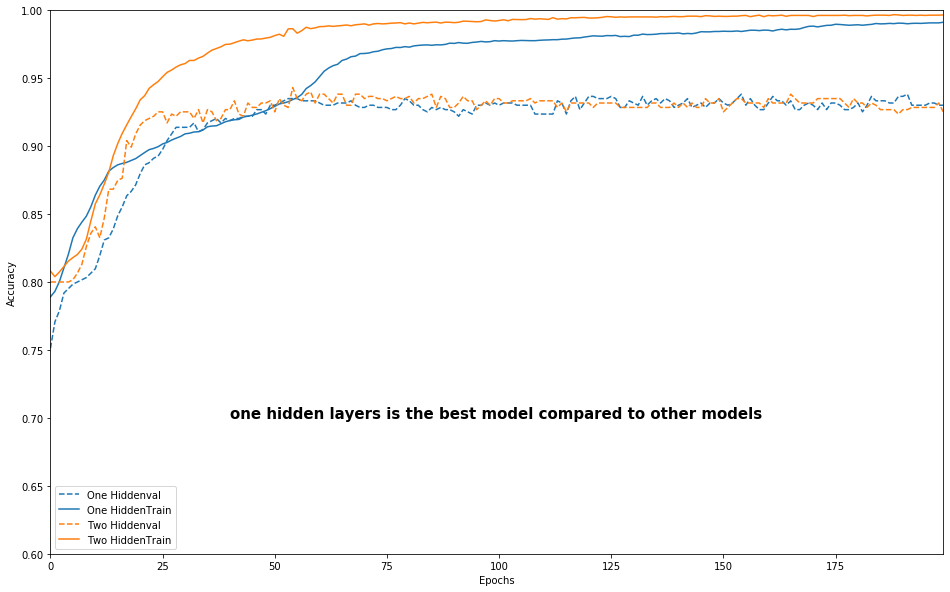

In [36]:
import matplotlib.pyplot as plt
def plot_history(histories, key):
    plt.figure(figsize=(16,10))
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label = name.title()+ 'val')
        plt.plot(history.epoch,history.history[key], color=val[0].get_color(),
             label =name.title()+'Train')
        plt.xlabel('Epochs')
        plt.ylabel(key.replace('_','').title())
        plt.legend()
        plt.xlim([0,max(history.epoch)])
        plt.ylim([0.6,1])
plot_history([('one hidden',b_history_norm),('two hidden',twohidden_history)],'accuracy') 
plt.annotate('one hidden layers is the best model compared to other models',
             xy=(40, 0.7), weight='bold',fontsize=15)

# b.   2/3 the size of input layer plus the size of the output layer Vs twice the size of the input layer

In [37]:
input2_model = keras.Sequential([
    keras.layers.Dense(13, activation=tf.nn.relu,
                       input_shape=(x_train_norm.shape[1],)), #2/3 size + output = 8+5 = 13
    keras.layers.Dense(5, activation = tf.nn.softmax)

  ])

input2_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=METRICS)

input2_model.summary()
input2_history = input2_model.fit(x_train_norm, y_train, epochs=EPOCHS,batch_size=128,
                    validation_data= (x_test_norm, y_test), verbose=0,
                    callbacks=[PrintDot()])


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 13)                169       
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 70        
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________

....................................................................................................
....................................................................................................

In [38]:
print('Metrics of baseline model without normalization \n  Accuracy: {:.2f}% \n  Recall: {:.2f}% \n'
      .format(max(input2_history.history['val_accuracy'])*100,max(input2_history.history['val_recall'])*100))

Metrics of baseline model without normalization 
  Accuracy: 94.96% 
  Recall: 86.18% 



In [39]:
input3_model = keras.Sequential([
    keras.layers.Dense(24, activation=tf.nn.relu,
                       input_shape=(x_train_norm.shape[1],)),
    keras.layers.Dense(5, activation = tf.nn.softmax)
  ])

input3_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=METRICS)

input3_model.summary()
input3_history = input3_model.fit(x_train_norm, y_train, epochs=EPOCHS,batch_size=128,
                    validation_data= (x_test_norm, y_test), verbose=0,
                    callbacks=[PrintDot()])


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 125       
Total params: 437
Trainable params: 437
Non-trainable params: 0
_________________________________________________________________

....................................................................................................
....................................................................................................

In [40]:
print('Metrics of baseline model without normalization \n  Accuracy: {:.2f}% \n  Recall: {:.2f}% \n'
      .format(max(input3_history.history['val_accuracy'])*100,max(input3_history.history['val_recall'])*100))

Metrics of baseline model without normalization 
  Accuracy: 95.93% 
  Recall: 89.43% 



Text(40, 0.7, 'model with Neurons twice the size of input size is best compared with other models')

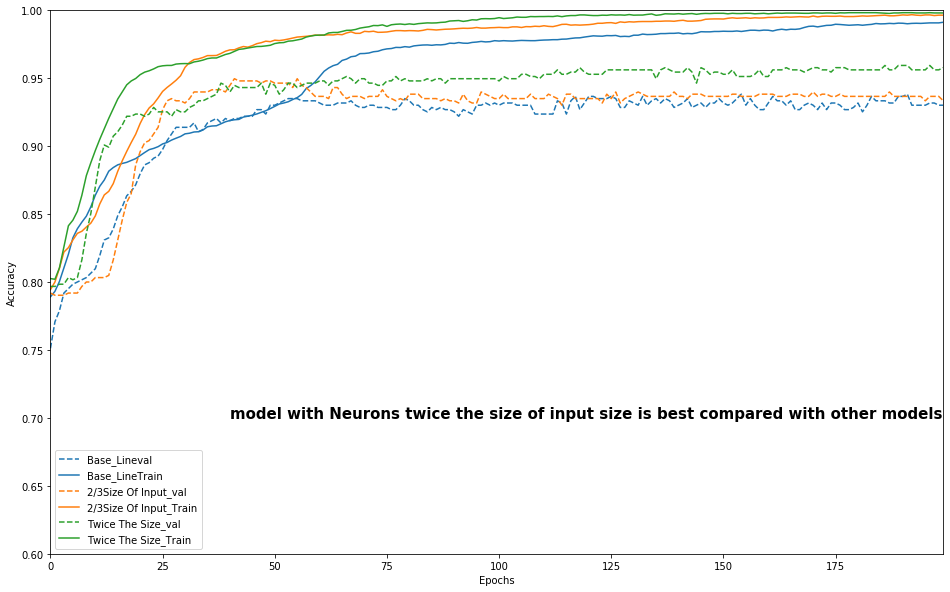

In [41]:
plot_history([('Base_line',b_history_norm),('2/3size of input_', input2_history),('twice the size_',input3_history)],'accuracy')
plt.annotate('model with Neurons twice the size of input size is best compared with other models',
             xy=(40, 0.7), weight='bold',fontsize=15)

# c. Regularization

In [42]:
regl1_model = keras.Sequential([
    keras.layers.Dense(24, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu,
                       input_shape=(x_train_norm.shape[1],)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(5, activation = tf.nn.softmax)
  ])
regl1_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=METRICS)
regl1_history = regl1_model.fit(x_train_norm, y_train, epochs=EPOCHS,batch_size=128,
                    validation_data= (x_test_norm, y_test), verbose=0,
                    callbacks=[PrintDot()])



....................................................................................................
....................................................................................................

In [43]:
print('Metrics of L1 Regularization model \n  Accuracy: {:.2f}% \n  Recall: {:.2f}% \n'
      .format(max(regl1_history.history['val_accuracy'])*100,max(regl1_history.history['val_recall'])*100))

Metrics of L1 Regularization model 
  Accuracy: 95.28% 
  Recall: 84.55% 



In [55]:
regl2_model = keras.Sequential([
    keras.layers.Dense(24, kernel_regularizer=keras.regularizers.l2(0.01), activation=tf.nn.relu,
                       input_shape=(x_train_norm.shape[1],)),
    keras.layers.Dropout(0.25),
    #keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l2(0.01), activation=tf.nn.relu),
   # keras.layers.Dropout(0.25),
    keras.layers.Dense(5, activation = tf.nn.softmax)
  ])
regl2_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=METRICS)
regl2_history = regl2_model.fit(x_train_norm, y_train, epochs=EPOCHS,
                    validation_data= (x_test_norm, y_test), verbose=0,
                    callbacks=[PrintDot()])



....................................................................................................
....................................................................................................

In [56]:
print('Metrics of L2 Regularization model \n  Accuracy: {:.2f}% \n  Recall: {:.2f}% \n'
      .format(max(regl2_history.history['val_accuracy'])*100,max(regl2_history.history['val_recall'])*100))

Metrics of L2 Regularization model 
  Accuracy: 96.26% 
  Recall: 90.24% 



Text(40, 0.7, 'L2 regularization is best compared with other models')

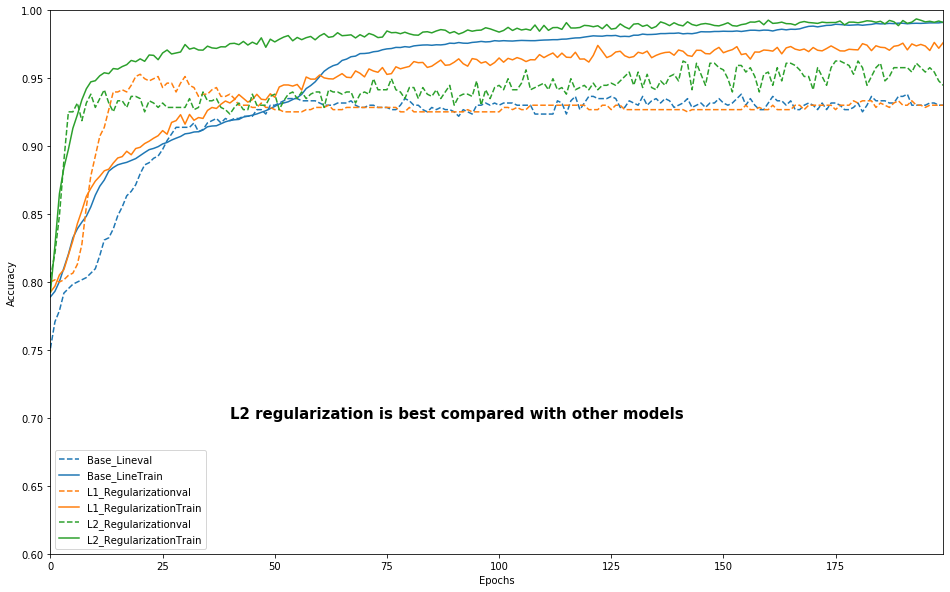

In [57]:
plot_history([('Base_line',b_history_norm),('L1_regularization', regl1_history),('L2_regularization',regl2_history)],'accuracy')
plt.annotate('L2 regularization is best compared with other models',
             xy=(40, 0.7), weight='bold',fontsize=15)

# d.	Activation function - ReLU and your choice

In [47]:
activation_model = keras.Sequential([
    keras.layers.Dense(24, activation=tf.nn.softplus,
                       input_shape=(x_train_norm.shape[1],)),
    keras.layers.Dense(5, activation = tf.nn.softmax)
  ])

activation_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=METRICS)

activation_model.summary()
activation_history = activation_model.fit(x_train_norm, y_train, epochs=EPOCHS,batch_size=128,
                    validation_data= (x_test_norm, y_test), verbose=0,
                    callbacks=[PrintDot()])


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_18 (Dense)             (None, 5)                 125       
Total params: 437
Trainable params: 437
Non-trainable params: 0
_________________________________________________________________

....................................................................................................
....................................................................................................

In [48]:
print('Metrics of L2 Regularization model \n  Accuracy: {:.2f}% \n  Recall: {:.2f}% \n'
      .format(max(activation_history.history['val_accuracy'])*100,max(activation_history.history['val_recall'])*100))

Metrics of L2 Regularization model 
  Accuracy: 94.15% 
  Recall: 84.55% 



Text(40, 0.7, 'model with Relu activation is best compared with other models')

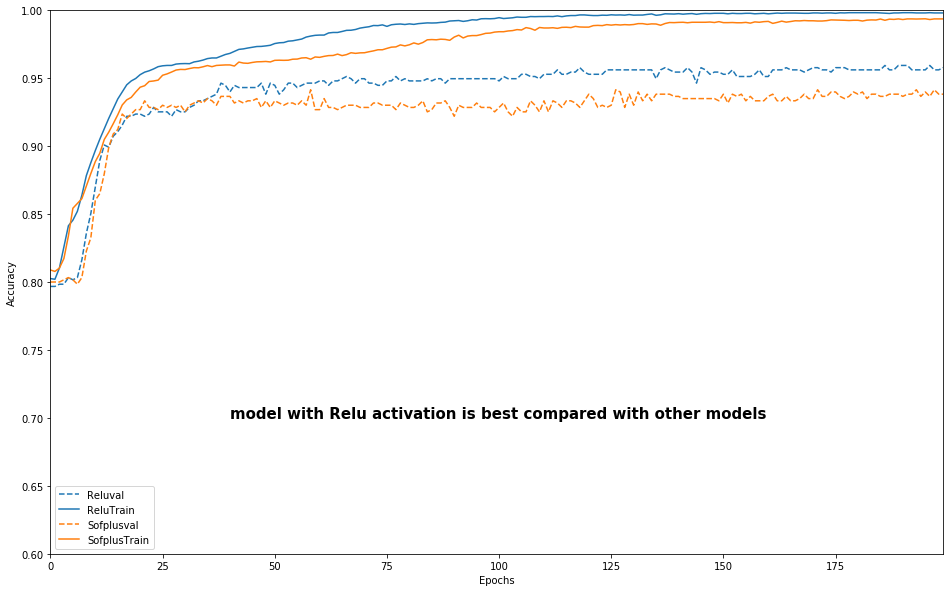

In [49]:
plot_history([('Relu',input3_history),('sofplus',activation_history)],'accuracy')
plt.annotate('model with Relu activation is best compared with other models',
             xy=(40, 0.7), weight='bold',fontsize=15)